* **pyforest:** Provides lazy imports for commonly used data science libraries, so you don't need to manually import them. It's intended to simplify code and reduce clutter - in other words: libraries pandas, matplotlib, seaborn, numpy and sklearn in one code line.
* **math:** A built-in Python module that provides mathematical functions and constants, such as sin, cos, and pi.
* **sidetable:** Extends pandas' DataFrame with an additional method called stb.freq_table, which returns a frequency table of the specified column(s), used here for missing values.
* **plotly:** Provides interactive data visualization tools, including charts and graphs.
* **plotly.express:** A high-level interface for creating interactive data visualizations with Plotly (my favorite one for visualization).
* plotly.graph_objs: A module that provides low-level tools for creating Plotly charts and graphs, such as traces and layouts.
* plotly.subplots: A module that provides tools for creating subplots with Plotly.
* **matplotlib.patches:** A module that provides classes for creating graphical shapes, such as rectangles and circles, in Matplotlib.
* **scipy.stats:** A module that provides statistical functions and tools, such as ttest_ind for performing a two-sample t-test.
* **pycountry:** Provides ISO databases for country-related data, such as country names, codes, and subdivisions.
* **pycountry_convert:** Provides tools for converting between country-related codes and data, such as ISO codes and country names.
* **warnings:** A built-in Python module that provides tools for issuing and handling warnings.
* **pygWalker:** Provides tools to visualize the simulation output and analyze the simulation results.


In [1]:
from pyforest import *
import math
import sidetable
import plotly as pl
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.patches as mpatches
import matplotlib
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import bar_chart_race as bcr
import pygwalker as pyg
import pycountry
import pycountry_convert as pc
import warnings

# World-wide Population:

In [2]:
dat = pd.read_csv(r"C:\Users\elon2\OneDrive\Desktop\programming\Data Analysis Projects\Data\worldPopulationData.csv")
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

In [3]:
dat.head(3)

Series Name  Series Code Country Name Country Code 1960 [YR1960]  \
0  Population, total  SP.POP.TOTL       Israel          ISR       2114020   
1  Population, total  SP.POP.TOTL  Afghanistan          AFG       8622466   
2  Population, total  SP.POP.TOTL      Albania          ALB       1608800   

  1961 [YR1961] 1962 [YR1962] 1963 [YR1963] 1964 [YR1964] 1965 [YR1965]  ...  \
0       2185000       2293000       2379000       2475000       2563000  ...   
1       8790140       8969047       9157465       9355514       9565147  ...   
2       1659800       1711319       1762621       1814135       1864791  ...   

  2012 [YR2012] 2013 [YR2013] 2014 [YR2014] 2015 [YR2015] 2016 [YR2016]  \
0       7910500       8059500       8215700       8380100       8546000   
1      30466479      31541209      32716210      33753499      34636207   
2       2900401       2895092       2889104       2880703       2876101   

  2017 [YR2017] 2018 [YR2018] 2019 [YR2019] 2020 [YR2020] 2021 [YR2021]  
0       8713300       8882800       9054000       9215100       9364000  
1      35643418      36686784      37769499      38972230      40099462  
2       2873457       2866376       2854191       2837849       2811666  

[3 rows x 66 columns]

In [4]:
dat.tail(3)

Series Name Series Code  \
268                                               NaN         NaN   
269  Data from database: World Development Indicators         NaN   
270                          Last Updated: 12/22/2022         NaN   

    Country Name Country Code 1960 [YR1960] 1961 [YR1961] 1962 [YR1962]  \
268          NaN          NaN           NaN           NaN           NaN   
269          NaN          NaN           NaN           NaN           NaN   
270          NaN          NaN           NaN           NaN           NaN   

    1963 [YR1963] 1964 [YR1964] 1965 [YR1965]  ... 2012 [YR2012]  \
268           NaN           NaN           NaN  ...           NaN   
269           NaN           NaN           NaN  ...           NaN   
270           NaN           NaN           NaN  ...           NaN   

    2013 [YR2013] 2014 [YR2014] 2015 [YR2015] 2016 [YR2016] 2017 [YR2017]  \
268           NaN           NaN           NaN           NaN           NaN   
269           NaN           NaN           NaN           NaN           NaN   
270           NaN           NaN           NaN           NaN           NaN   

    2018 [YR2018] 2019 [YR2019] 2020 [YR2020] 2021 [YR2021]  
268           NaN           NaN           NaN           NaN  
269           NaN           NaN           NaN           NaN  
270           NaN           NaN           NaN           NaN  

[3 rows x 66 columns]

### Cleaning and organizing:

In [5]:
yrs = [dat.columns[x][:4] for x in range(len(dat.columns)) if x > 3]
for i in range(len(yrs)):
    yrs[i] = int(yrs[i])
cols = list(dat.columns[:4])
for x in range(4):    
    if ' ' in cols[x]:
        cols[x] = cols[x].replace(" ", "")     # removing spaces for comfort
cols.extend(yrs)
dat.columns = cols

In [6]:
dat = dat.dropna(subset = ['CountryName'])
dat = dat.drop(dat.index[252])

In [7]:
dat.dtypes

SeriesName     object
SeriesCode     object
CountryName    object
CountryCode    object
1960           object
                ...  
2017           object
2018           object
2019           object
2020           object
2021           object
Length: 66, dtype: object

In [8]:
dat['CountryName'].head(220).unique

<bound method Series.unique of 0                           Israel
1                      Afghanistan
2                          Albania
3                          Algeria
4                   American Samoa
                  ...             
215                         Zambia
216                       Zimbabwe
217    Africa Eastern and Southern
218     Africa Western and Central
219                     Arab World
Name: CountryName, Length: 220, dtype: object>

#### * Countries by their names are up to line 217

In [9]:
countries = dat.iloc[:217,]
countries = countries.replace('..',0)

#### * Missing values

In [10]:
countries.stb.missing().sum()

missing        0.0
total      14322.0
percent        0.0
dtype: float64

---

### The increase in the world's population over the years :

In [11]:
wrld = dat[(dat.CountryName == 'World')]
wrld

SeriesName   SeriesCode CountryName CountryCode        1960  \
265  Population, total  SP.POP.TOTL       World         WLD  3031564839   

           1961        1962        1963        1964        1965  ...  \
265  3072510552  3126934725  3193508879  3260517816  3328284623  ...   

           2012        2013        2014        2015        2016        2017  \
265  7140895722  7229184551  7317508753  7404910892  7491934113  7578157615   

           2018        2019        2020        2021  
265  7661776338  7742681934  7820981524  7888408686  

[1 rows x 66 columns]

In [12]:
# Clean and sort:
forvis = wrld.iloc[:,4::5]
vals = pd.DataFrame(sorted(wrld.iloc[:,4::5].values)).values
forvis

<IPython.core.display.Javascript object>

1960        1965        1970        1975        1980        1985  \
265  3031564839  3328284623  3690306927  4070114517  4442440474  4850160867   

           1990        1995        2000        2005        2010        2015  \
265  5293517142  5726801833  6144322697  6552571570  6969631901  7404910892   

           2020  
265  7820981524

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

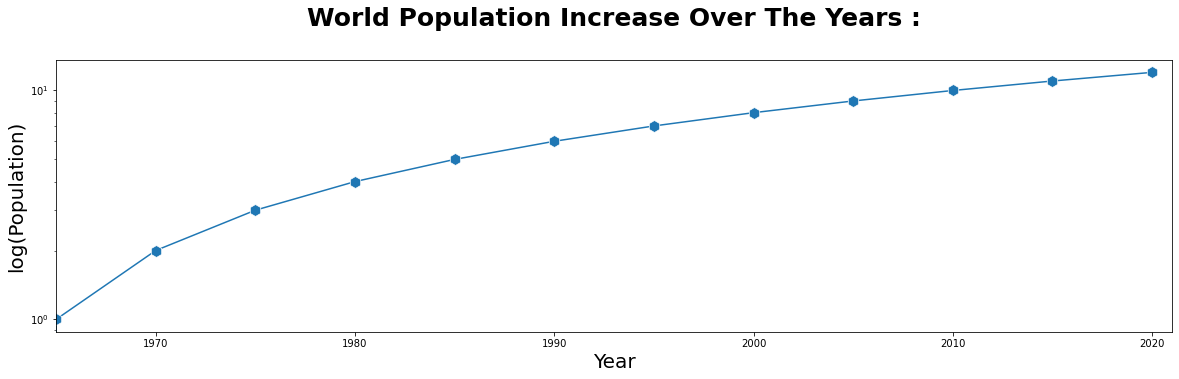

In [13]:
plt.figure(figsize = (20,5))
ax = sns.lineplot(x = forvis.columns, y = vals[::-1].flatten(), marker='h', markersize = 12)
plt.gca().invert_yaxis()
plt.title('World Population Increase Over The Years :\n',size = 25,fontweight = "bold")
# plt.text(2021, 5000, 'Significant population increase', fontsize=12, fontweight='bold')
plt.xlabel('Year', size = 20)
plt.ylabel('log(Population)',size = 20)
plt.xlim([1965,2021])
ax.set_yscale("log")
plt.show()

### Cheking Repetitiveness with Regression Models:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

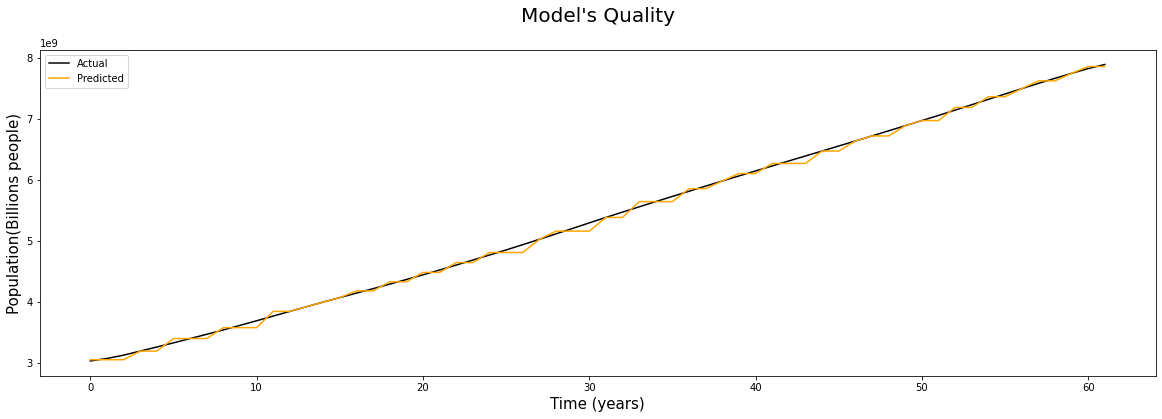

In [14]:
nwrld = wrld.iloc[:,4:]
nwrld = nwrld.T.reset_index().rename(columns = {'index':'Year', 265:'Population'})
nwrld.Population = pd.to_numeric(nwrld.Population)
regmodel = DecisionTreeRegressor(max_depth=5)
X = nwrld[['Year']]
y = nwrld[['Population']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regmodel.fit(X_train,y_train)
pred = regmodel.predict(X)

actual_values = np.array(y['Population'])
predicted_values = pred
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(pd.to_numeric(actual_values), color='black', label='Actual')
ax.plot(pred, color='orange', label='Predicted')
ax.set_xlabel('Time (years)',size = 15)
ax.set_ylabel('Population(Billions people)',size = 15)
ax.legend()
plt.title("Model's Quality\n", size = 20)
plt.show()

In [15]:
pred2 = regmodel.predict(X_test)
mse = mean_squared_error(y_test, pred2)
r2 = r2_score(y_test, pred2)
mae = mean_absolute_error(y_test, pred2)
pd.DataFrame([{'MSE': mse, 'MAE' : mae, 'r^2':r2, 'r' : r2**0.5}])

<IPython.core.display.Javascript object>

MSE           MAE       r^2        r
0  9.307788e+15  9.406073e+07  0.994547  0.99727

In [16]:
print(f"The model is not capable of predicting values above the highest known value, for example - prediction for world's population in 2500 is {int(regmodel.predict([[2500]]))},     equal to 2021")

The model is not capable of predicting values above the highest known value, for example - prediction for world's population in 2500 is 7854695105,     equal to 2021


#### Scipy's *stats* can be useful for resolving the problem

In [17]:
x = nwrld.Year
y = nwrld.Population
slope, intercept, r, p, std_err = stats.linregress(x,y)
pd.DataFrame([{'Slope': slope, 'Intercept' : intercept, 'r^2':r**2, 'r' : r, 'std':std_err}])

<IPython.core.display.Javascript object>

Slope     Intercept      r^2        r            std
0  8.176666e+07 -1.573898e+11  0.99904  0.99952  327273.129817

##### prediction for 2050:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

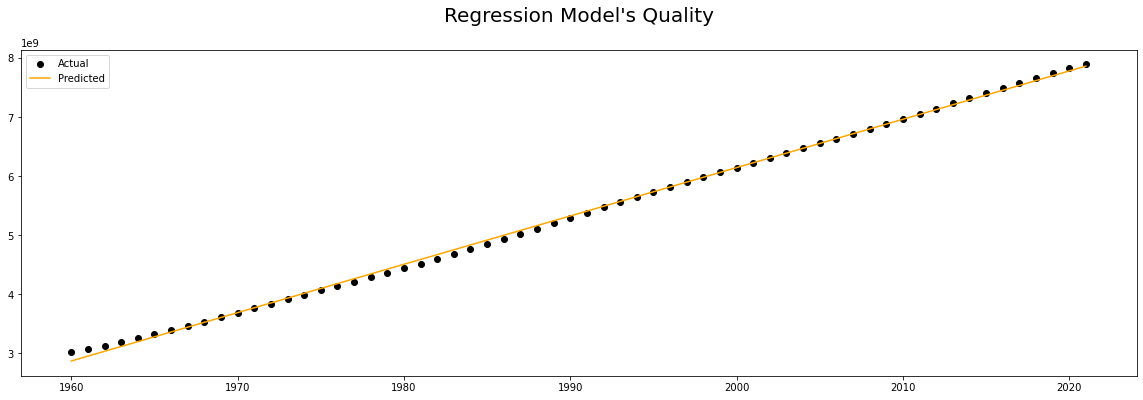

In [18]:
def lr_forecast(x):
    # Our regression equation :
    return slope * x + intercept
lr_model = list(map(lr_forecast, x))
fig, ax = plt.subplots(figsize=(20, 6))
plt.title("Regression Model's Quality\n", size = 20)
plt.scatter(x, y, color = 'black', label = 'Actual' )
plt.plot(x, lr_model, color = 'orange', label = 'Predicted')
plt.legend()
plt.show()

In [19]:
lr_forecast(2500)

47026813387.46753

<!-- <div style="text-align:center">
     
<img src="thumbsUp.jpg" width="450"/>
<div> -->

---

### **Annual** Grow Rate:

In [20]:
last = len(nwrld) - 1
# In the end of 2022 - World's population was 8 Billion.
nwrld['one_year_diff'] = [nwrld.Population[c+1] - nwrld.Population[c] if c < last else 8000000000-nwrld.Population[last] for c in range(len(nwrld.Population))]
nwrld

Year  Population  one_year_diff
0   1960  3031564839       40945713
1   1961  3072510552       54424173
2   1962  3126934725       66574154
3   1963  3193508879       67008937
4   1964  3260517816       67766807
..   ...         ...            ...
57  2017  7578157615       83618723
58  2018  7661776338       80905596
59  2019  7742681934       78299590
60  2020  7820981524       67427162
61  2021  7888408686      111591314

[62 rows x 3 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

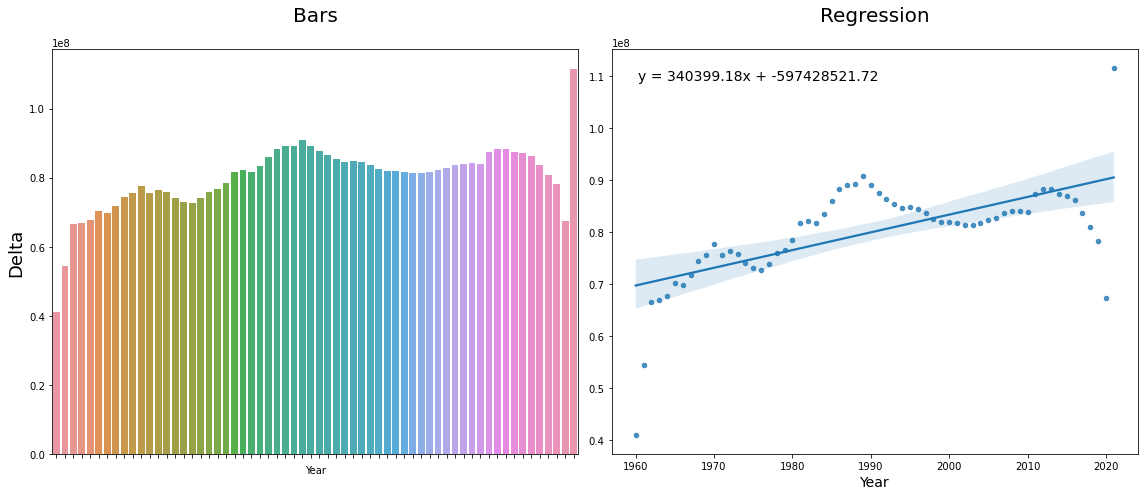

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 7))
sns.barplot(x='Year', y='one_year_diff', data=nwrld, ax=ax1, capsize=0.2)
# ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Delta', fontsize=18)
ax1.set_title('Bars\n', fontsize=20)
ax1.set_xticklabels([])

sns.regplot(x='Year', y='one_year_diff', data=nwrld, ax=ax2, scatter_kws={'s': 20, 'cmap': 'rainbow'})
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('')
ax2.set_title('Regression\n', fontsize=20)
x = nwrld['Year']
y = nwrld['one_year_diff']
coefficients = np.polyfit(x, y, 1)
m,b = coefficients[0],coefficients[1]
equation = f"y = {m:.2f}x + {b:.2f}"
ax2.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=14, ha='left', va='top')
plt.tight_layout()
plt.show()

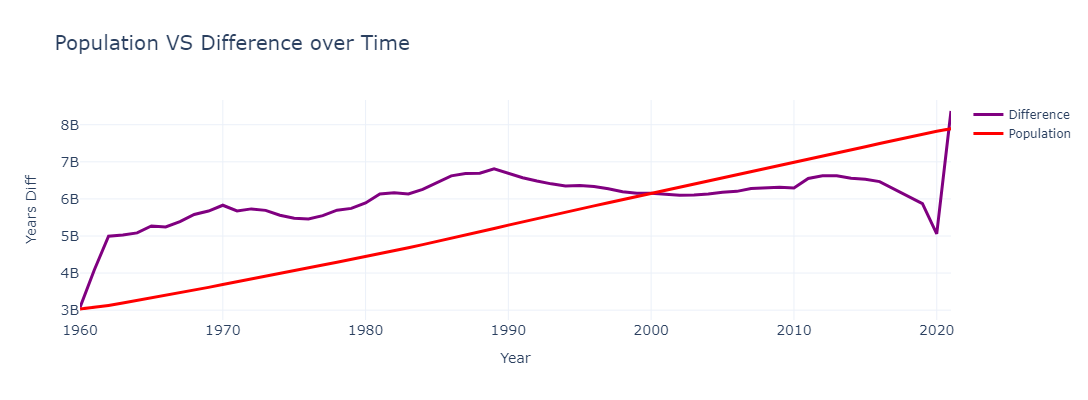

In [22]:
fig = go.Figure()
hover_template1 = "<b>Year:</b> %{x}<br><b>Delta * 75 :</b> %{y:.2f}"
hover_template2 = "<b>Year:</b> %{x}<br><b>Population :</b> %{y:.2f}"

# multiply by 75 the diffs for comparable vizualization
fig.add_trace(go.Scatter(x=nwrld.Year, y=nwrld.one_year_diff*75, line=dict(color="purple", width=3), hovertemplate=hover_template1, name="Difference"))
fig.add_trace(go.Scatter(x=nwrld.Year, y=nwrld.Population, line=dict(color="red", width=3), hovertemplate=hover_template2, name="Population"))
fig.update_layout(title=dict(text="Population VS Difference over Time", font=dict(size=20)), xaxis=dict(title="Year", tickfont=dict(size=14)),
    yaxis=dict(title="Years Diff", tickfont=dict(size=14)), template="plotly_white", height=400, width=800)
fig.show()

- notice the scaling on y-axis values.
- A recurring trend in each of the charts is sharp decrease of grow difference value on 2020, probably due to the corona virus.
- The difference on 2020 is like in 1960 !
- As we can see, despite the covid - the world population has never stopped from growing.

---

## Population Differences **By country** (1690-2021):
Try to change 'k' to any value (in the range) to see the according number of countries at any side of the scale:

In [23]:
countriesT = countries.T
countriesT.columns = countries['CountryName'].values
countriesT['West Bank and Gaza'] = countriesT['West Bank and Gaza'].replace(0,countriesT['West Bank and Gaza'][1990])
countriesT = countriesT.iloc[4:,]

In [24]:
# 1 <= k <= 216
k = 10

In [25]:
def total_growth(country):
    return int(countriesT[country].values[-1]) - int(countriesT[country].values[0])

In [26]:
dictionary = {}
for country in countriesT.columns:
    dictionary[country] = total_growth(country)
sortedict = dict(sorted(dictionary.items(), key = lambda item: item[1], reverse=False))
dict_lowest = dict(list(sortedict.items())[:k])
dict_highest = dict(list(sortedict.items())[-k:])

#### Plotting the Findings:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

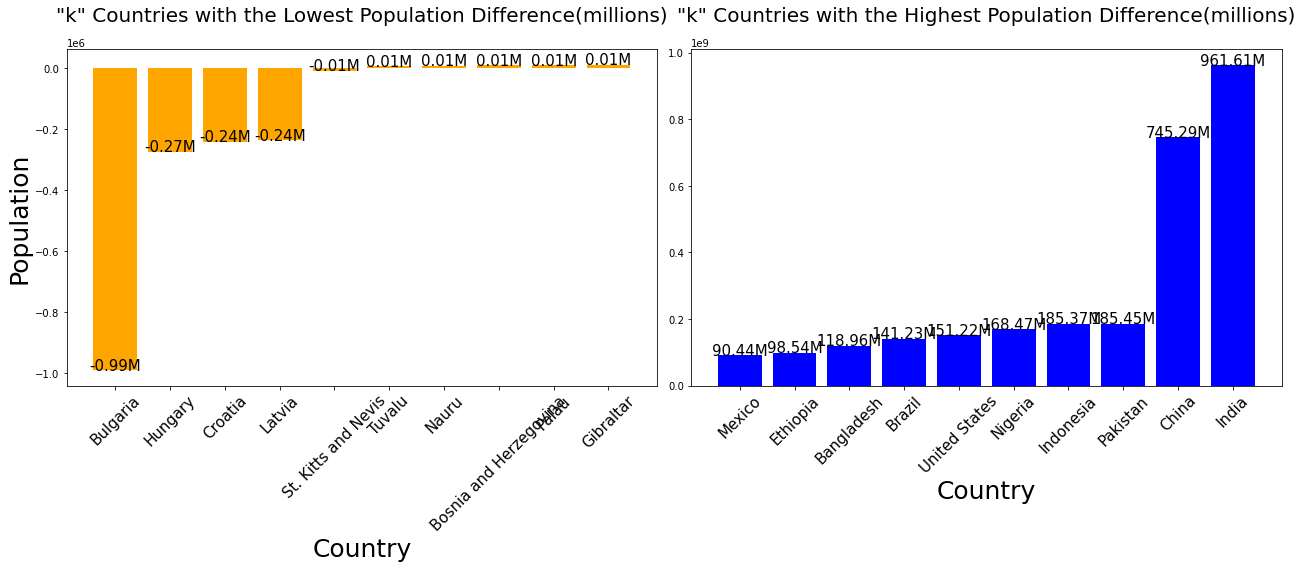

In [27]:
fig, (ax1, ax2) = plt.subplots(figsize=(18, 8), ncols=2)
ax1.bar(x=list(dict_lowest.keys()), height=dict_lowest.values(), color = 'orange')
ax2.bar(x=list(dict_highest.keys()), height=dict_highest.values(), color = 'blue')

ax1.set_xlabel('Country', size = 25)
ax1.set_ylabel('Population', size = 25)
ax1.set_title('"k" Countries with the Lowest Population Difference(millions)\n', size = 20)
ax2.set_xlabel('Country', size = 25)
ax2.set_title('"k" Countries with the Highest Population Difference(millions)\n', size = 20)

ax1.set_xticks(range(len(dict_lowest)))
ax1.set_xticklabels(dict_lowest.keys(), rotation=45, size = 15)
ax2.set_xticks(range(len(dict_highest)))
ax2.set_xticklabels(dict_highest.keys(), rotation=45, size = 15)
plt.tight_layout()

for i, (key, value) in enumerate(dict_lowest.items()):
    ax1.text(i, value + 1000, f"{value/1000000:.2f}M", ha='center', size = 15)

for i, (key, value) in enumerate(dict_highest.items()):
    ax2.text(i, value + 1000000, f"{value/1000000:.2f}M", ha='center', size = 15)

---

## Population changes in relation to the existing situation ;
Try to change 'n' to any value (in the range) to see the according number of countries at any side of the scale:

In [28]:
#   1 <= n <= 216
n = 20

In [29]:
def relative_growth(country):
    return total_growth(country) / int(countriesT[country].values[-1])
dictionary2 = {}
for country in countriesT.columns:
    dictionary2[country] = relative_growth(country)
sortedict2 = dict(sorted(dictionary2.items(), key = lambda item: item[1], reverse=False))
dict_lowest2 = dict(list(sortedict2.items())[:n])
dict_highest2 = dict(list(sortedict2.items())[-n:])
dd = dict_lowest2 | dict_highest2
df = countries[countries.CountryName.isin(dd.keys())]
df['diff'] = (pd.to_numeric(df[2021]) - pd.to_numeric(df[1960]))
df['relative'] = pd.to_numeric(df[1960])/(pd.to_numeric(df[2021]))
df = df.sort_values('relative')
df = df.loc[:,['CountryName','CountryCode','diff','relative']]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

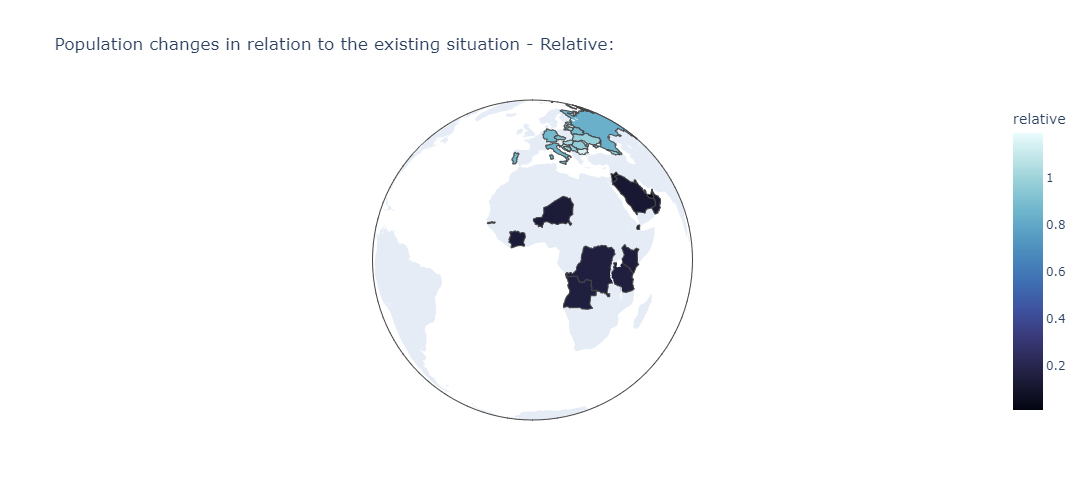

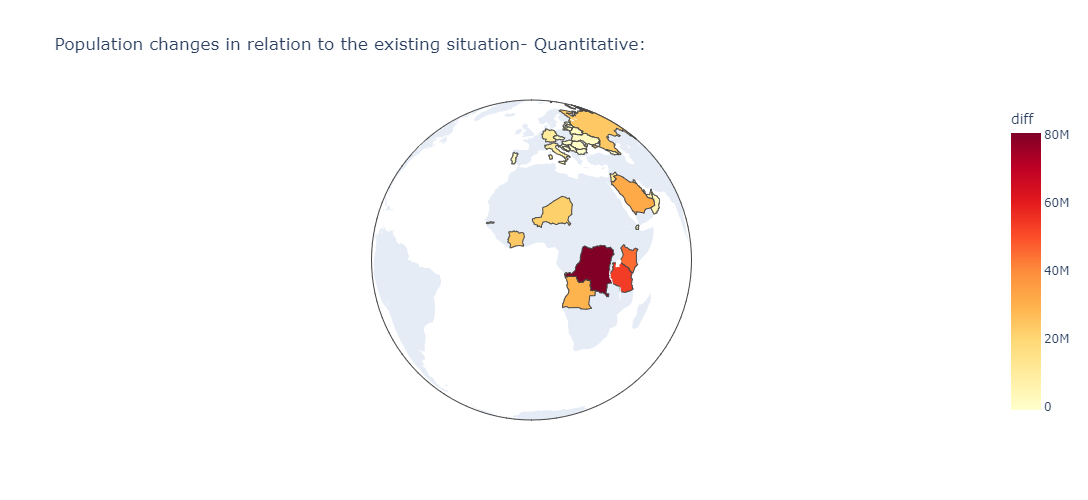

In [30]:
fig1 = px.choropleth(df,locations='CountryCode',
                    color='relative',
                    title='Population changes in relation to the existing situation - Relative:',
                    # color_discrete_map={'red': 'red', 'green': 'green'},
                    hover_data=['CountryName'],
                    color_continuous_scale=px.colors.sequential.ice,
                    height=500,
                    width=700)
fig2 = px.choropleth(df,locations='CountryCode',
                    color='diff',
                    title='Population changes in relation to the existing situation- Quantitative:',
                    hover_data=['CountryName'],
                    color_continuous_scale=px.colors.sequential.YlOrRd,
                    height=500,
                    width=700)
fig1.update_layout(geo=dict(showframe=True, showcoastlines=False,projection_type='orthographic'))
fig2.update_layout(geo=dict(showframe=True, showcoastlines=False,projection_type='orthographic'))
fig1.show()
fig2.show()

* **For both estimators :** Darker color -> Bigger change.
* The highest rate of population relative growth belongs to the countries of the Middle East & Africe, while the lowest belongs to Europian countries. 
* Regarding the numeric changes - there's no noticeable unambiguous trend exept of slow growth among the population of Europe.

---

#### We can read any data about any country and cross it with it's population to investigate phenomena and interesting things, for example:

## Population and Land area (present):

In [31]:
area = pd.read_csv(r"C:\Users\elon2\OneDrive\Desktop\programming\Data Analysis Projects\Data\land-area-km.csv")

<IPython.core.display.Javascript object>

In [32]:
countries[2021] = pd.to_numeric(countries[2021])
areanow = area[area.Year == 2021].rename(columns = {'Land area (sq. km)':'Area'})
popnow = countries[['CountryName','CountryCode',2021]]
popnow.rename(columns = {'CountryCode':'Code',2021:'population'}, inplace = True)
comb1 = areanow.merge(popnow, on = 'Code')[['CountryName','Code','population','Area']]
comb1.sample(10)

<IPython.core.display.Javascript object>

CountryName Code  population          Area
154                     Poland  POL    37747124  3.061700e+05
115                     Malawi  MWI    19889742  9.428000e+04
205              United States  USA   331893745  9.147420e+06
101                   Kiribati  KIR      128874  8.100000e+02
119                      Malta  MLT      518536  3.200000e+02
130                 Mozambique  MOZ    32077072  7.863800e+05
135                Netherlands  NLD    17533044  3.367000e+04
174  Sint Maarten (Dutch part)  SXM       42846  3.400000e+01
176                   Slovenia  SVN     2108079  2.013640e+04
4                      Andorra  AND       79034  4.700000e+02

* pd.merge() function is similar to JOIN statement on SQL.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

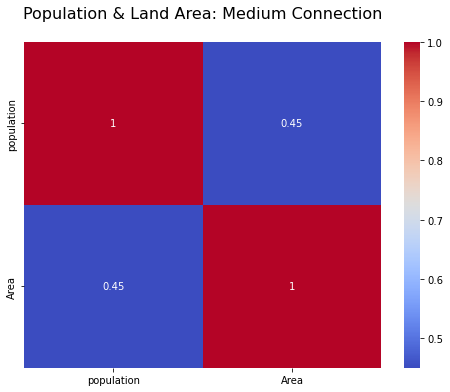

In [33]:
corr = comb1.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", ax=ax)
ax.set_title("Population & Land Area: Medium Connection\n", fontsize=16)
plt.show()

In [34]:
comb1['PeoplePerKM2'] = comb1['population'] / comb1['Area']
comb1 = comb1.sort_values('PeoplePerKM2')
comb1[comb1.CountryName == 'Israel']
density = comb1[['CountryName','Code','PeoplePerKM2']]
density.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 76 to 113
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CountryName   215 non-null    object 
 1   Code          215 non-null    object 
 2   PeoplePerKM2  215 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.7+ KB


### Using *pycountry* library :

In [35]:
# Create dictionary with all countries to match each for its continent.
region_map = {}
for country in pycountry.countries:
    try:
        country_alpha_2 = country.alpha_2
        country_region = pc.country_alpha2_to_continent_code(country_alpha_2)
        region_map[country.name] = country_region
    except KeyError:
        pass
density['Region'] = density['CountryName'].map(region_map)
density = density.dropna(subset=["Region"])
new_labels = {"NA":"North America", "SA": "South America", "EU": "Europe", "AS":"Asia","AF": "Africa", "OC":"Oceania"}
density.Region = density.Region.map(new_labels)
density.sample(5)

CountryName Code  PeoplePerKM2         Region
160       Rwanda  RWA    545.678476         Africa
156  Puerto Rico  PRI    367.935062  North America
200       Tuvalu  TUV    373.466667        Oceania
151     Paraguay  PRY     16.873393  South America
123       Mexico  MEX     65.179217  North America

- Got terrestrial density list by units of (people/km**2)

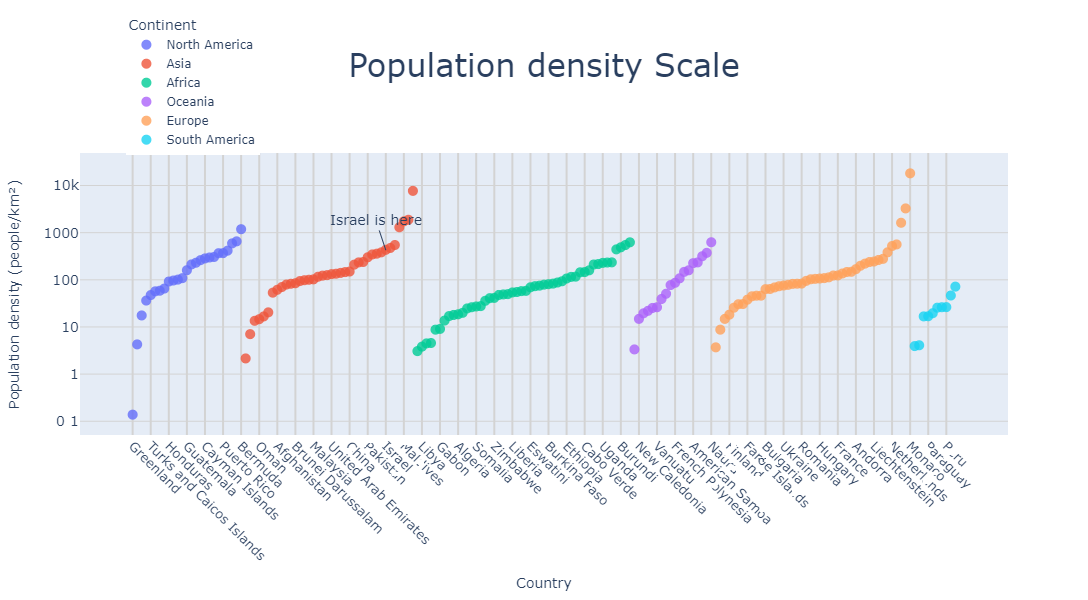

In [36]:
fig = px.scatter(density, x="CountryName", y="PeoplePerKM2", log_y=True, title="Population density Scale", color="Region")
fig.update_layout(width=800, height=600, title_x=0.5, title_font=dict(size=32),
    xaxis=dict(title='Country', showgrid=True, gridwidth=2, gridcolor='lightgray', tickangle=45, tickfont=dict(size=13)),
    yaxis=dict(title='Population density (people/km²)', showgrid=True, gridwidth=1, gridcolor='lightgray', tickfont=dict(size=14)),
    legend_title="Continent",legend=dict(yanchor="top", y=1.5, xanchor="left", x=0.05))
fig.add_annotation(x=56, y=2.63, text="Israel is here", showarrow=True, font=dict(size=14))
fig.update_traces(marker=dict(size=10, opacity=0.8))
fig.show()

### Focusing continent's mean values

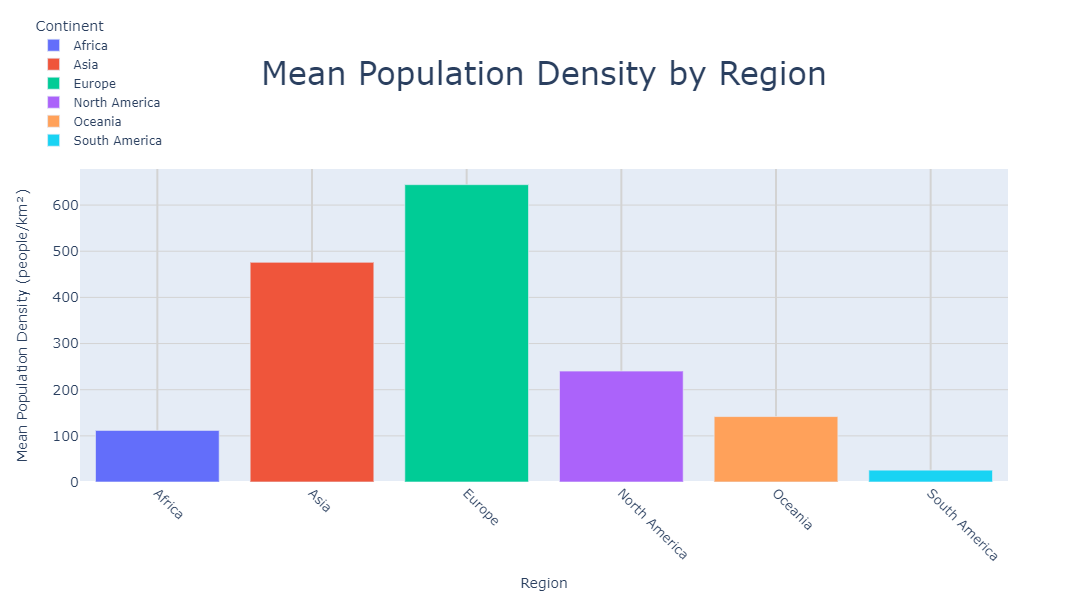

In [37]:
meanDen = density.groupby("Region").mean().reset_index()
fig = px.bar(meanDen, x="Region", y="PeoplePerKM2", color="Region", title="Mean Population Density by Region")
fig.update_layout(width=950, height=600, title_x=0.5, title_font=dict(size=32),
    xaxis=dict(title='Region', showgrid=True, gridwidth=2, gridcolor='lightgray', tickangle=45, tickfont=dict(size=13)),
    yaxis=dict(title='Mean Population Density (people/km²)', showgrid=True, gridwidth=1, gridcolor='lightgray', tickfont=dict(size=14)),
    legend_title="Continent",legend=dict(yanchor="top", y=1.5, xanchor="left", x=-0.05))
fig.show()

---

#### Glance at the other part of the data:

In [38]:
rest = dat.iloc[:,2:].tail(48)
rest = rest.set_index(rest.CountryName).iloc[:,2:].T.reset_index()
rest = rest.rename(columns={'index':'Year'})
rest = rest.set_index(rest.Year)
rest = rest.iloc[:,1:]
rest = rest.astype(float)
rest.columns

Index(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific', 'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income', 'IBRD only',
       'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total',
       'Late-demographic dividend', 'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification', 'Low & middle income',
       'Low income', 'Lower middle income', 'Middle

### The relationship between the population growth rate and income levels:

In [39]:
incomes = rest[['Heavily indebted poor countries (HIPC)','Low income','Lower middle income','Middle income','Upper middle income','High income']].reset_index()
incomes.sample(5)

CountryName  Year  Heavily indebted poor countries (HIPC)   Low income  \
1            1961                             167427839.0  145732351.0   
60           2020                             838066650.0  699186538.0   
41           2001                             488040621.0  411561975.0   
44           2004                             532571131.0  449503454.0   
36           1996                             425839678.0  359616245.0   

CountryName  Lower middle income  Middle income  Upper middle income  \
1                   1.013696e+09   2.129016e+09         1.115320e+09   
60                  3.357118e+09   5.852404e+09         2.495285e+09   
41                  2.505435e+09   4.681845e+09         2.176410e+09   
44                  2.639297e+09   4.866337e+09         2.227039e+09   
36                  2.280816e+09   4.355694e+09         2.074878e+09   

CountryName   High income  
1            7.893096e+08  
60           1.240901e+09  
41           1.108052e+09  
44           1.128754e+09  
36           1.073742e+09

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

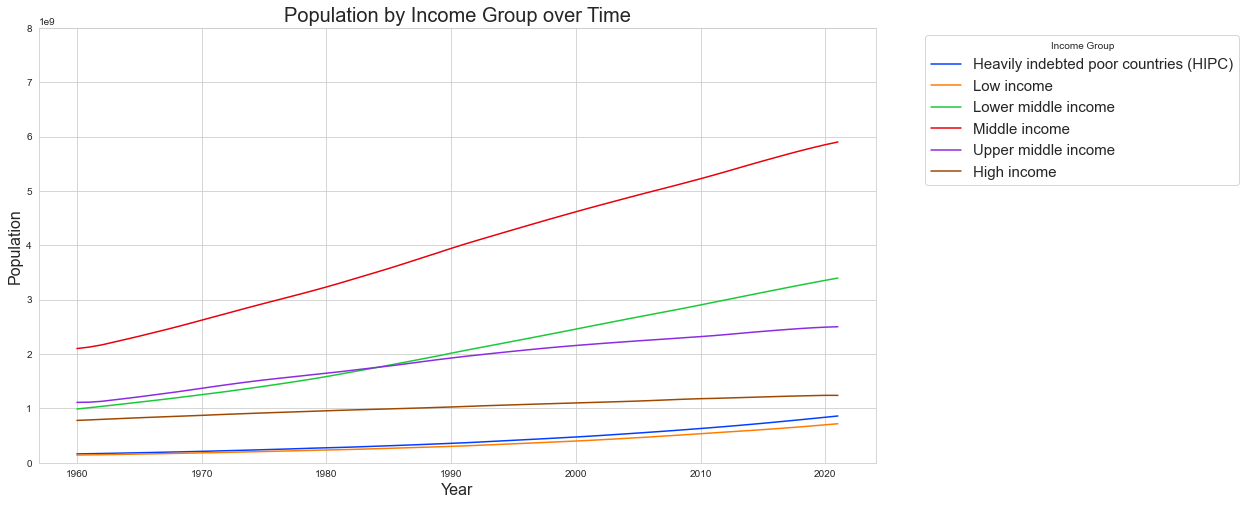

In [40]:
incomes_melted = pd.melt(incomes, id_vars='Year', var_name='Income Group', value_name='Population')
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=incomes_melted, x='Year', y='Population', hue='Income Group', palette='bright', ax=ax)
ax.set_ylim(0, 8e9)
plt.title('Population by Income Group over Time', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.legend(title='Income Group', fontsize=15, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### * After requesting chatGPT for better interactive vizualization:

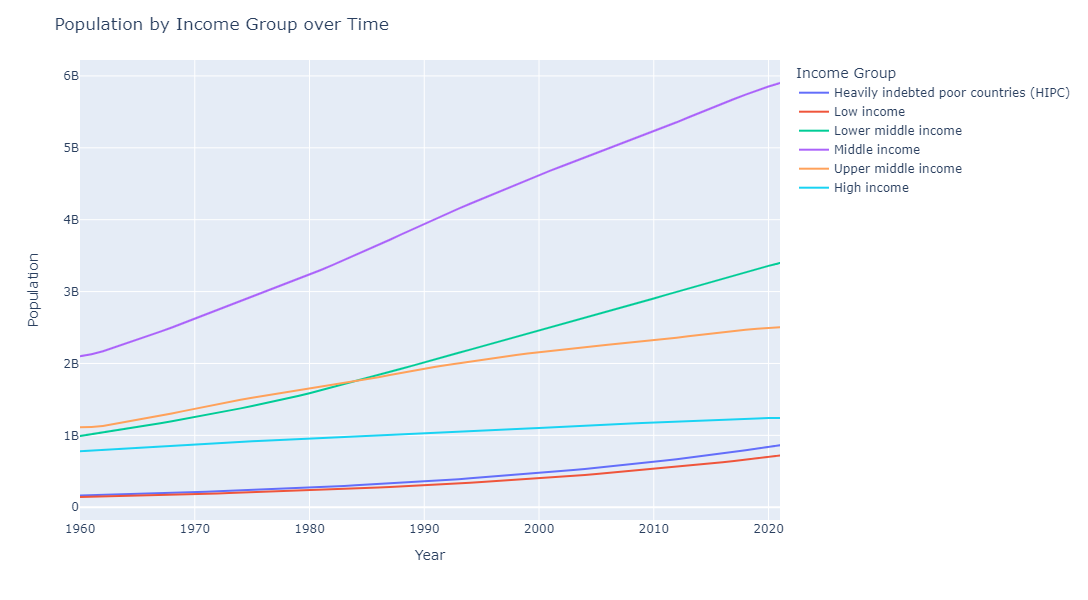

In [41]:
fig = px.line(incomes_melted, x='Year', y='Population', color='Income Group')
fig.update_layout(
    title='Population by Income Group over Time',
    xaxis_title='Year',
    yaxis_title='Population',
    legend_title='Income Group',
    font=dict(size=12),width = 1200,
    height=600)
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

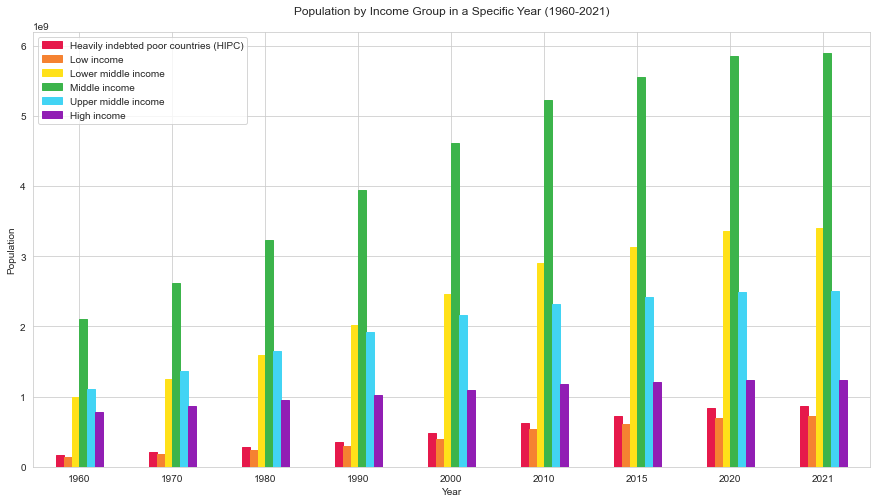

In [42]:
incomes_10yrs = incomes[incomes['Year'].isin([1960, 1970, 1980, 1990, 2000, 2010, 2015, 2020, 2021])]
fig, ax = plt.subplots(figsize=(15, 8))
incomes_10yrs.plot.bar(x="Year", y=["Heavily indebted poor countries (HIPC)", "Low income", "Lower middle income", "Middle income", "Upper middle income", "High income"], ax=ax, rot=0, color=["#FF5733", "#FFFF66", "#00FF00", "#00CED1", "#800080", "#DC143C", "#008080"])
colors = ['#e6194b', '#f58231', '#ffe119', '#3cb44b', '#42d4f4', '#911eb4', '#4363d8']
for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        bar.set_color(colors[i])
legend_patches = [mpatches.Patch(color=colors[i], label=label) for i, label in enumerate(incomes_10yrs.columns[1:])]
plt.legend(handles=legend_patches)
plt.title("Population by Income Group in a Specific Year (1960-2021)\n")
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

* regarding the mean value:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

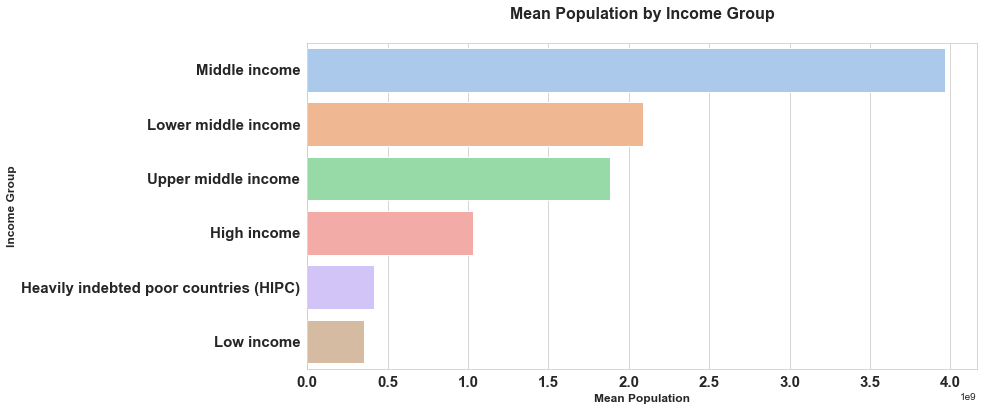

In [43]:
income_means = incomes_melted.groupby('Income Group')[['Population']].mean().sort_values('Population', ascending = False)
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(x='Population', y=income_means.index, data=income_means, palette='pastel')
plt.xlabel('Mean Population', fontsize=12, fontweight='bold')
plt.ylabel('Income Group', fontsize=12, fontweight='bold')
plt.title('Mean Population by Income Group\n', fontsize=16, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.show()

* It can be concluded from the charts that among people with a middle income - the rate of growth is greater compared to those with a high income or alternatively - to those with a low income or poor areas.

---

## Life Expectation (Present) :

In [44]:
life_exp = pd.read_csv(r"C:\Users\elon2\OneDrive\Desktop\programming\Data Analysis Projects\Data\life-expectancy.csv")
life_exp = life_exp.rename(columns = {'Entity':'CountryName','Code':'CountryCode','Life expectancy at birth (historical)':'lifeExp'})
life_exp21 = life_exp[life_exp.Year == 2021]

<IPython.core.display.Javascript object>

In [45]:
new_countries = countries.iloc[:,2:].set_index(['CountryName']).reset_index().iloc[1:,:][['CountryCode','CountryName',2021]].rename(columns = {2021:'Population2021'})
new_countries

CountryCode            CountryName  Population2021
1           AFG            Afghanistan        40099462
2           ALB                Albania         2811666
3           DZA                Algeria        44177969
4           ASM         American Samoa           45035
5           AND                Andorra           79034
..          ...                    ...             ...
212         VIR  Virgin Islands (U.S.)          105870
213         PSE     West Bank and Gaza         4922749
214         YEM            Yemen, Rep.        32981641
215         ZMB                 Zambia        19473125
216         ZWE               Zimbabwe        15993524

[216 rows x 3 columns]

In [46]:
merged1 = life_exp21.merge(new_countries, on = 'CountryCode').sort_values('lifeExp')[['CountryName_x','Population2021','lifeExp']].rename(columns = {'CountryName_x':'CountryName'})
merged1.sample(10)

CountryName  Population2021  lifeExp
41     Colombia        51516562     72.8
9         Aruba          106537     74.6
120  Mauritania         4614974     64.4
76    Greenland           56653     72.4
124     Moldova         2615199     68.8
104      Latvia         1884490     73.6
35   Cape Verde          587925     74.1
53     Djibouti         1105557     62.3
83        Haiti        11447569     63.2
151        Peru        33715471     72.4

In [47]:
merged2 = density.merge(merged1, on ='CountryName')
merged2.sample(10)

CountryName Code  PeoplePerKM2         Region  Population2021  \
13                   Gabon  GAB      9.085959         Africa         2341179   
30                  Bhutan  BTN     20.385055           Asia          777486   
135  Sao Tome and Principe  STP    232.403125         Africa          223107   
122                   Togo  TGO    158.941515         Africa         8644829   
143             Luxembourg  LUX    263.400823         Europe          640064   
111                 Jordan  JOR    125.571953           Asia        11148278   
5                    Libya  LBY      3.827862         Africa         6735277   
89                Honduras  HND     91.861158  North America        10278345   
49               Lithuania  LTU     44.720406         Europe         2800839   
37                  Zambia  ZMB     26.195032         Africa        19473125   

     lifeExp  
13      65.8  
30      71.8  
135     67.6  
122     61.6  
143     82.6  
111     74.3  
5       71.9  
89      70.1  
49      73.7  
37      61.2

In [48]:
life_exp.groupby('CountryName')[['Year','CountryName','lifeExp']].min().Year.unique()

array([1950, 1770, 1923, 1940, 1875, 1885, 1870, 1876, 1900, 1841, 1945,
       1931, 1831, 1930, 1899, 1895, 1775, 1927, 1920, 1897, 1755, 1816,
       1921, 1877, 1911, 1838, 1881, 1901, 1872, 1865, 1868, 1908, 1896,
       1924, 1893, 1926, 1850, 1948, 1846, 1946, 1938, 1932, 1882, 1751,
       1937, 1543, 1880], dtype=int64)

In [49]:
life_exp.groupby('CountryName')[['Year','CountryName','lifeExp']].max().Year.unique()

array([2021], dtype=int64)

* For each country, the highest life expectancy is **at the present**.

In [50]:
life_exp.CountryName.unique()[::10]

array(['Afghanistan', 'Argentina', 'Barbados', 'Botswana', 'Cape Verde',
       'Costa Rica', 'Dominica', 'Europe', 'Georgia', 'Guernsey', 'India',
       'Jersey', 'Latin America and the Caribbean', 'Liechtenstein',
       'Mali', 'Monaco', 'Nepal', 'Northern America', 'Paraguay',
       'Rwanda', 'Sao Tome and Principe',
       'Small Island Developing States (SIDS)', 'Sweden', 'Tonga',
       'United Kingdom', 'Wallis and Futuna'], dtype=object)

##### for comparing between several countries - just enter the country name into the "selected_list" and run the next block:

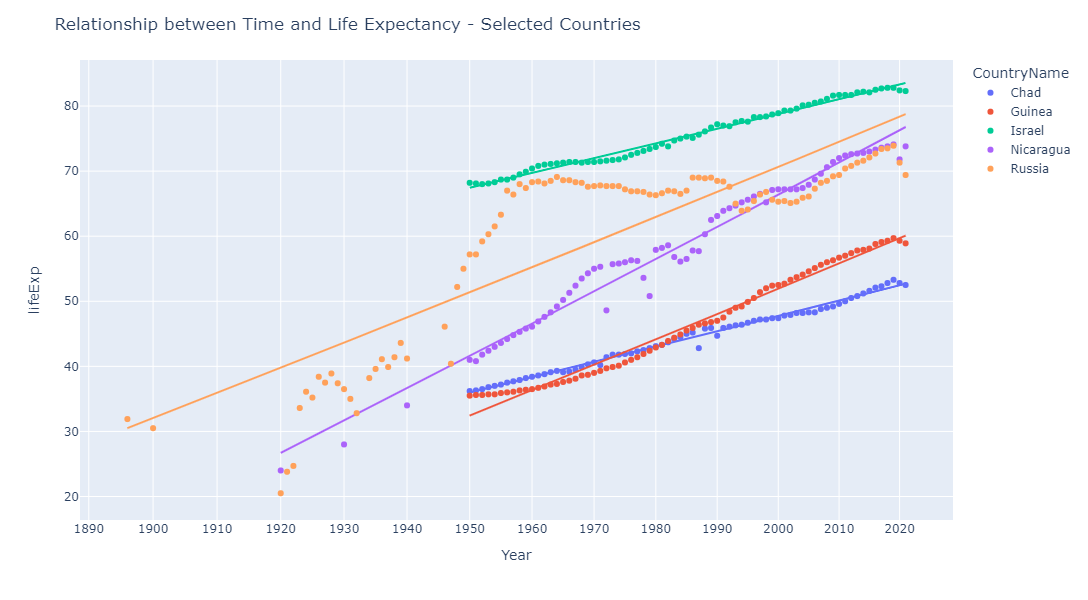

In [51]:
selected_lst = ['Israel','Russia','Nicaragua','Chad','Guinea']
new_exp = life_exp[life_exp.CountryName.isin(selected_lst)]
fig = px.scatter(new_exp, x='Year', y='lifeExp',trendline='ols', hover_data=['CountryName'],color = 'CountryName')
fig.update_layout(title='Relationship between Time and Life Expectancy - Selected Countries',width=1050, height=600)
     
fig.update_xaxes(type='log')
fig.show()

---

### Importing GDP per capita for each country (Present):

In [52]:
hadash = pd.read_csv(r"C:\Users\elon2\OneDrive\Desktop\programming\Data Analysis Projects\Data\GPD_per_capita_numeric.csv")

<IPython.core.display.Javascript object>

In [53]:
hadash21 = hadash[['Country Name','2021']].rename(columns = {'Country Name':'CountryName','2021':'GDP2021','lifeExp':'lifeExp2021'})
merged3 = hadash21.merge(merged2, on = 'CountryName').rename(columns = {'lifeExp':'lifeExp2021'})
merged3 = merged3.merge(comb1[['CountryName','Area']], on = 'CountryName')
merged3.sample(5)

CountryName       GDP2021 Code  PeoplePerKM2         Region  \
52      Finland  53654.750300  FIN     18.231827         Europe   
44      Denmark  68007.756670  DNK    146.418325         Europe   
0         Aruba  29342.100860  ABW    591.872222  North America   
153    Slovenia  29291.400620  SVN    104.689962         Europe   
99   Madagascar    500.511032  MDG     49.700332         Africa   

     Population2021  lifeExp2021           Area  
52          5541017         82.0  303920.000000  
44          5856733         81.4   40000.000000  
0            106537         74.6     180.000000  
153         2108079         80.7   20136.400391  
99         28915653         64.5  581800.000000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

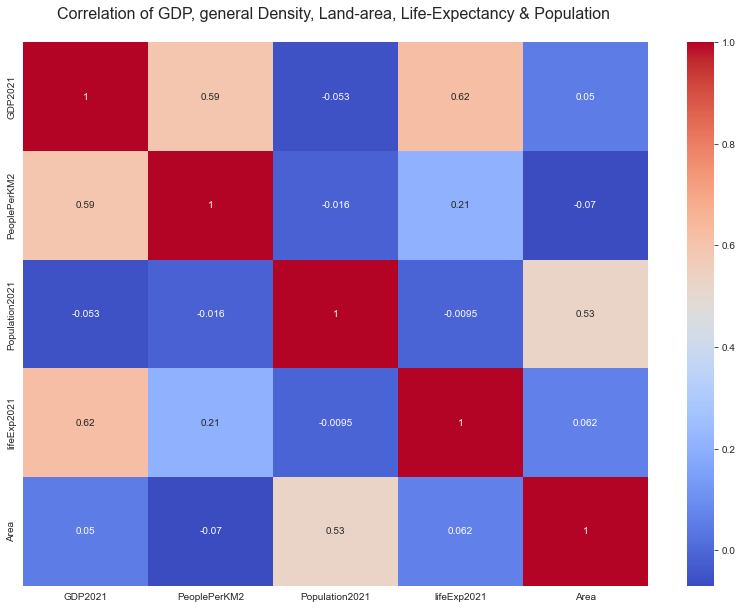

In [54]:
plt.subplots(figsize=(14,10)) 
fig = sns.heatmap(merged3.corr(), annot = True, cmap = 'coolwarm')
fig.set_title("Correlation of GDP, general Density, Land-area, Life-Expectancy & Population \n", fontsize=16)
plt.show()

### Connected Variables: 
* Population & Land-area (0.53) - slightly different than the same last calculation due to different data sample.
* GDP & Life-expectation (0.62) - makes sense.
* GDP & density - (0.59) considering the superficial calculation that was carried out (population size divided by area) - we will regard the density information conclusion with little suspicion (too general), but still, there is a connection.

#### 

## Displaying the correlations in a nicer way:

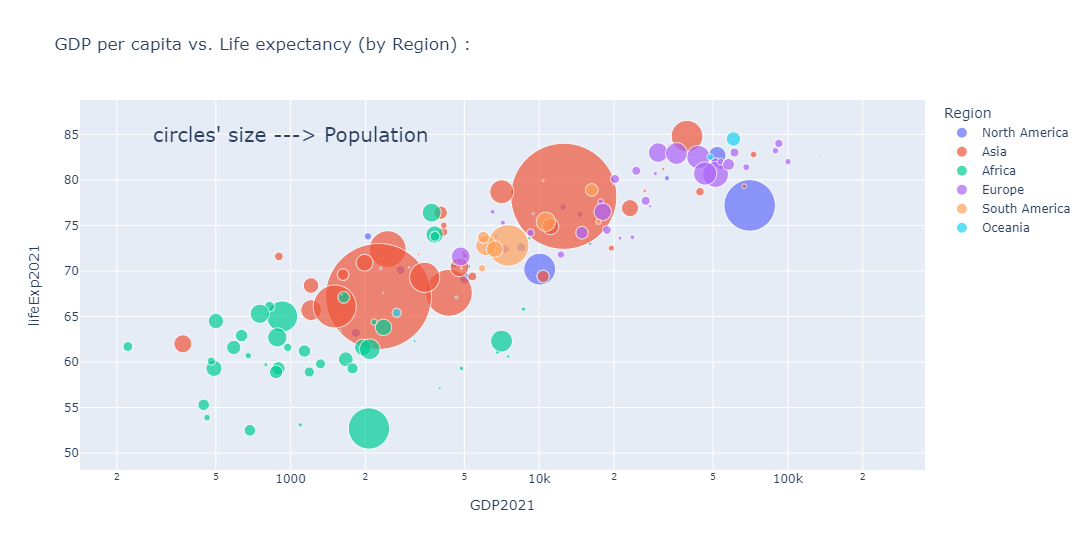

In [55]:
fig = px.scatter(merged3, x="GDP2021", y="lifeExp2021", color="Region",
                 hover_name="CountryName", size="Population2021", title="GDP per capita vs. Life expectancy (by Region) :",
                 size_max=75, log_x=True, log_y=False, width = 1100, height = 550)
fig.add_annotation(x=3, y=85, text="circles' size ---> Population", showarrow=False, font=dict(size=20))
fig.show()

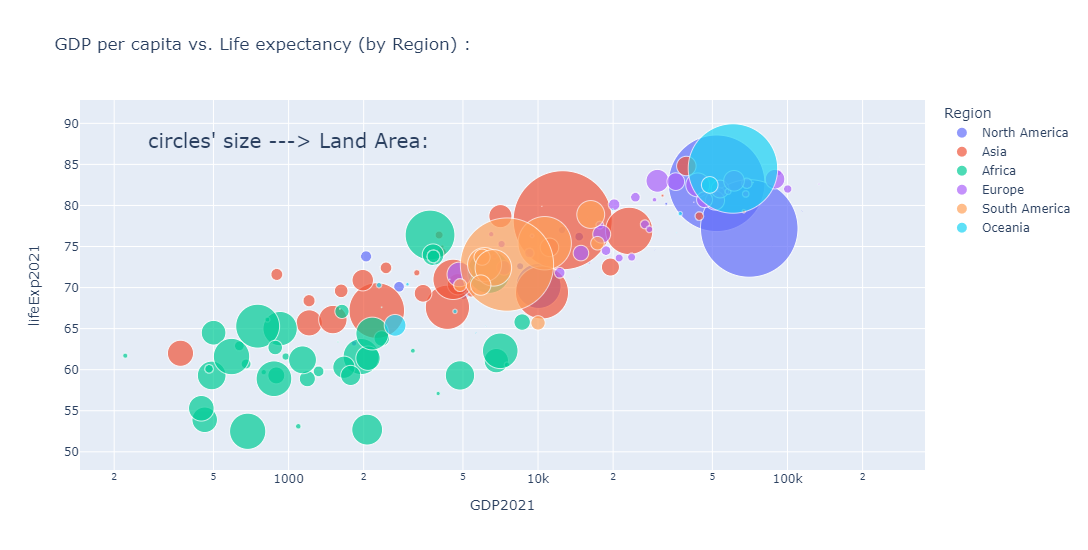

In [56]:
fig = px.scatter(merged3, x="GDP2021", y="lifeExp2021", color="Region",
                 hover_name="CountryName", size="Area", title="GDP per capita vs. Life expectancy (by Region) :",
                 size_max=70, log_x=True, log_y=False,width = 1100, height = 550)
fig.add_annotation(x=3, y=88, text="circles' size ---> Land Area:", showarrow=False, font=dict(size=20))
fig.show()

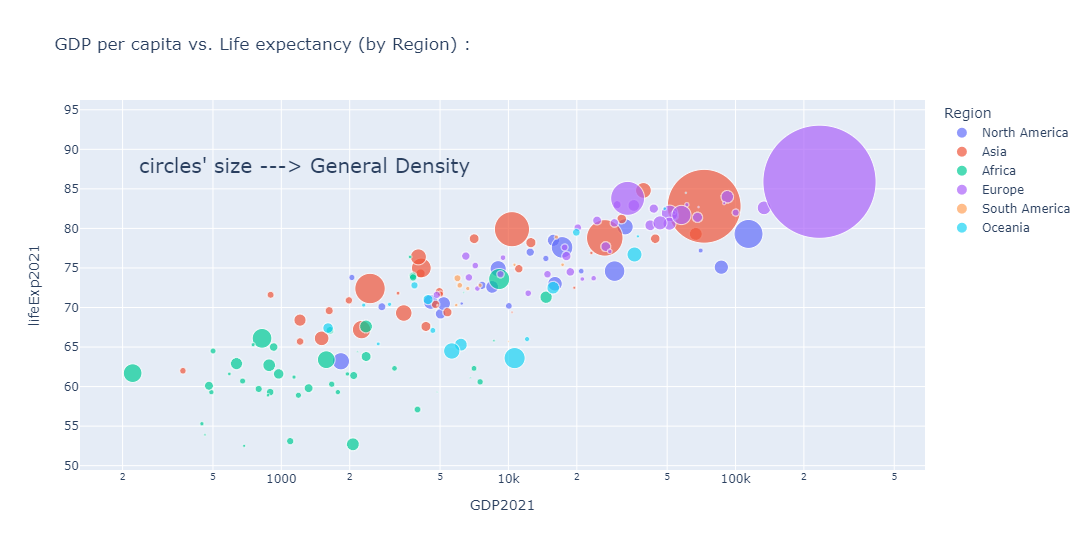

In [57]:
fig = px.scatter(merged3, x="GDP2021", y="lifeExp2021", color="Region",
                 hover_name="CountryName", size="PeoplePerKM2", title="GDP per capita vs. Life expectancy (by Region) :",
                 size_max=80, log_x=True, log_y=False,width = 1100, height = 550)
fig.add_annotation(x=3.1, y=88, text="circles' size ---> General Density", showarrow=False, font=dict(size=20))
fig.show()

### We can easily notice the connection between GDP and life-expectation.
---

### Example of using *pygwalker*:

In [58]:
gwalker = pyg.walk(merged3)

---

<div style="text-align:center">
<img src="thanks-watching-neon-sign.jpg" width="450"/>
<div>


---